

---


# Projet, AI recongition

In this project you will find how we can create a personalisable database with the faces you want , train an AI and finally, testing if you have access with restrictions.



# ***Summary***

# 1. Importations_and_definitions
 
1.   We create function to get the camera of the device
2.   Élément de liste



# 2. Adding new elements to the database

1.  Initialisation
2.  Manually adding
3.  Automatic adding

# 3. Training and labelisation

# 4. Prediction






---



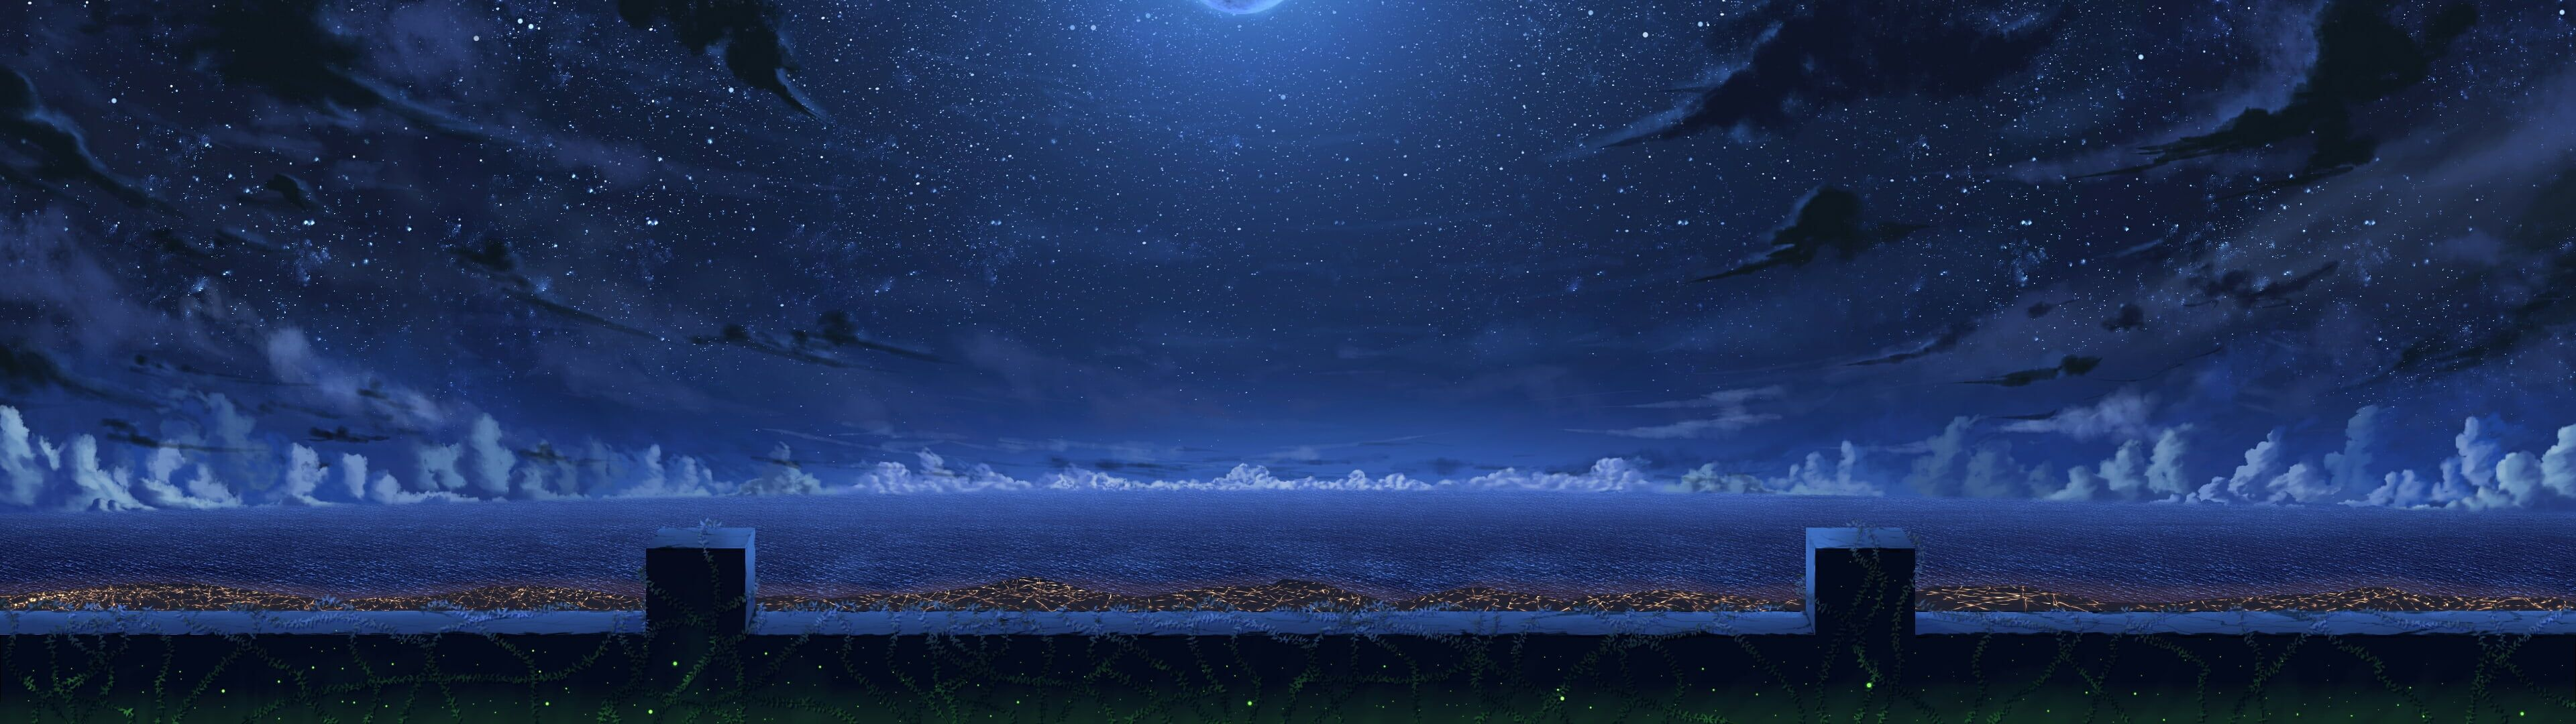



---
#1 Importations and definitions



## 1-1 main importations

Here we will find every importation we will need for later

In [3]:
import numpy as np
import cv2
import imutils
import numpy as np
from google.colab.patches import cv2_imshow
from zipfile import ZipFile
import os
from tqdm import tqdm
import time as time
from IPython.display import clear_output
import random as rd

import matplotlib.pyplot as plt

Here we are getting the data from the Zip in order to recover the faceDetection function

We will then initiate the face recognition and the eyes recognition

In [4]:
from zipfile import ZipFile
file_name = "./projet-data2.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

face_cascade = cv2.CascadeClassifier('Data-FaceDetection and Recognition/haarcascades/haarcascade_frontalface_default.xml')
eye_ascade = cv2.CascadeClassifier('Data-FaceDetection and Recognition/haarcascades/haarcascade_eye.xml')

Done


##1-2 We create function to get the camera of the device


We create the 2 mains functions that we will use to activate the webcam with google collab

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photolive(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      (resolve) => capture.onclick = resolve;

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

---
# 2-Adding new elements to the database


there are 2 ways to add new faces to the database. First one is manualy you have to launche the cell the number of time you want to add your face. Index will be automatically increamented 

the other way is the automatic one which allow you to launch only one cell and it will take photo until you have 10 goods ones









## 2-1 Initialisation

initiate the values of the database

In [6]:
dct = { "Alexis" : 1,"Jc" :2,"G" : 3,"Jeremy":4}
indexUsed = [1,2,3,4]
dctcolor = { "Alexis" : (0,0,255),"Jc" :(200,5,237),"G" : (255,0,0),"Jeremy" : (100,100,0)}
idx = 0

color= (255,0,0)


## 2-2 manual adding element
*   idx = index de la photo à ajouter 
*   nameToAdd = Nom de la personne à ajouter

Create your own value ? 
We will add the dictionnary your name with a unique Index and Color

In [7]:
nameToAdd= "A"

dct[nameToAdd] = rd.choice([x for x in range(1000) if x not in indexUsed])
dctcolor[nameToAdd] = color 

Function to add manualy a face with a label to the database

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  img = cv2.imread('photo.jpg')
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  print(faces)


  for (x,y,w,h) in faces:
    roi = img[y:y+h,x:x+w].copy() 
    resized = cv2.resize(roi, (250,250))

  cv2_imshow(resized)
  
  path = str('./dataset2/' + str(nameToAdd)+ str(idx) +'.jpg')
  print(path)
  cv2.imwrite(path, resized) 
  idx+=1

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## 2-3 Automatic adding in the database



function to add automaticaly labelized faces to the database

<IPython.core.display.Javascript object>

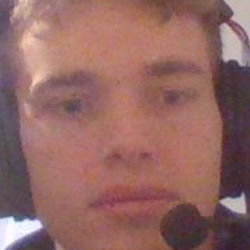

[xxx-------]     30 %

KeyboardInterrupt: ignored

In [8]:
nameInput = input("Please Enter the name you want to add : ") 
clear_output()


dct[nameToAdd] = rd.choice([x for x in range(1000) if x not in indexUsed])
dctcolor[nameToAdd] = color 

print("\nBe ready , we will take 10 photos of you every 2 seconds")
print("try to Take different position")

def printBar(index,loadingBar):
  print("[",end="")
  for i in loadingBar:
    print(i,end ="")
  print("]","   ",int(100*(index+1)/len(loadingBar)),"%",end="")


#####################
for i in range(4):
  time.sleep(1)
#####################


clear_output()
indexPhoto = 0 
maxIndexPhoto = 10

loadingBar = ['-' for i in range(maxIndexPhoto)]

while indexPhoto<maxIndexPhoto:

  faces=[]
  filename = take_photolive()

  img = cv2.imread(filename)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)



  if len(faces)==1:

    for (x,y,w,h) in faces:
      roi = img[y:y+h,x:x+w].copy() 
      resized = cv2.resize(roi, (250,250))

      cv2_imshow(resized)
      path = str('./dataset2/' + str(nameInput)+ str(indexPhoto) +'.jpg')
      cv2.imwrite(path, resized) 
      loadingBar[indexPhoto]='x'
      printBar(indexPhoto,loadingBar)
      time.sleep(2)
      indexPhoto+=1

  else: 
    print("redo plz")
  
  clear_output()


      

print('Saved to {}'.format(filename))


---
# 3. Training and labelisation

Function to train with labelisation 

In [9]:
import sys
import os
import random
from sklearn.utils import shuffle


# Charger les images et leurs labels dans deux listes
faces = []
labels = []

path = './dataset2/'



for img in os.listdir(path):
  if  img.endswith('.jpg') or img.endswith('.png'):
    pathimg = path + "/"+img 
    faces.append(cv2.cvtColor(cv2.imread(pathimg), cv2.COLOR_BGR2GRAY))
    name = ''.join(filter(str.isalpha, img[:-4]))
    labels.append(dct[name])

faces, labels = shuffle(np.array(faces), np.array(labels))

print(labels)

# Initialiser de la reconnaissance de visage
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

#Pour entertainer un modèle d’apprentissage sur cette base, il suffit d’appliquer la méthode :
face_recognizer.train(faces, np.array(labels))

#Ensuite, la reconnaissance d’un visage se fait avec la méthode:
#label = face_recognizer.predict(img)

[2 1 1 2 3 2 1 2 1 2 1 1 1 3 1 1 1 3 2 1 3 2 3 1 1 2 3 1 2 2 1 2 2 1 2 2 3
 1 1 1 1 1 2 1 1 3 3 1 2 2 2 2 1 1 3 2]



---

# 4. Prediction

In this function that we will launch , we are getting activated the camera and we can take a picture. 
With the name we entered we will compare the face detected with the AI we trained, and we will compare it to the index value of the dictionnary


In [10]:
from IPython.display import Image

faces = []
nameInput = input("Please Enter name : ") 
os.system('clear')
print("Take a picture of yourself")

try:
  filename = take_photo()
  
  img = cv2.imread('/content/photo.jpg')
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  if len(faces)==1:
    print("test")
    for (x,y,w,h) in faces:
      roi = img[y:y+h,x:x+w].copy() 
      resized = cv2.resize(roi, (250,250))
      label = face_recognizer.predict(cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY))
      name = list(dct.keys())[list(dct.values()).index(label[0])]

      cv2.rectangle(img,(x,y),(x+w,y+h),dctcolor[name],2)
      img = cv2.putText(img, name, (x+10, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1,dctcolor[name], 3, cv2.LINE_AA)

    if name == nameInput:
      print("Access Validated")
    else:
      print("Access Denied")

    #cv2_imshow(img)

  elif len(faces)>1:
    print("To many faces")
    print("Please Redo the picture")

  else: 
    print("No faces detected")
    print("Please Redo the picture")
  
    

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Please Enter name : Alexis
Take a picture of yourself


<IPython.core.display.Javascript object>

test
Access Validated
